### importing the all the necessary libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_stores=pd.read_csv('stores.csv')
df_features=pd.read_csv('features.csv')

In [3]:

print(df_train.shape)
df_train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
print(df_test.shape)
df_test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
print(df_stores.shape)
df_stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [7]:
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

### Exploratory Data Analysis:

(array([48789., 38735., 50596., 39067., 39632., 50161., 36866., 42663.,
        34463., 40598.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

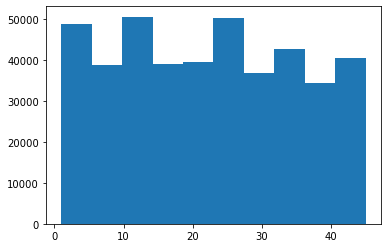

In [8]:
plt.hist(df_train['Store'])

In [10]:
df_s_ws.shape

(421570, 2)

In [12]:
plt.rcParams['figure.figsize']=(10,8)

In [14]:
df_features.shape


(8190, 12)

In [15]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
df_features['Date'].nunique()

182

In [17]:
df_train['Date'].nunique()

143

In [18]:
df_merge=df_train.merge(df_stores,how='left').merge(df_features,how='left')

In [19]:
df_merge.shape
df_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [20]:
df_merge['Date'].nunique()

143

In [22]:
df_merge.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [23]:
df_merge['MarkDown1'].isnull().sum()

270889

In [24]:
len(df_merge['MarkDown1'])


421570

In [25]:
for i in df_merge.columns:
    print('column {} have :{}% null values'.format(i,(df_merge[i].isnull().sum()/len(df_merge[i]))*100))

column Store have :0.0% null values
column Dept have :0.0% null values
column Date have :0.0% null values
column Weekly_Sales have :0.0% null values
column IsHoliday have :0.0% null values
column Type have :0.0% null values
column Size have :0.0% null values
column Temperature have :0.0% null values
column Fuel_Price have :0.0% null values
column MarkDown1 have :64.25718148824632% null values
column MarkDown2 have :73.61102545247527% null values
column MarkDown3 have :67.48084541120099% null values
column MarkDown4 have :67.98467632896079% null values
column MarkDown5 have :64.07903788220224% null values
column CPI have :0.0% null values
column Unemployment have :0.0% null values


In [28]:
df_merge['Weekly_Sales'].corr(df_merge['MarkDown5'])

0.09036206126433421

In [29]:
m=df_merge.corr()

<AxesSubplot:>

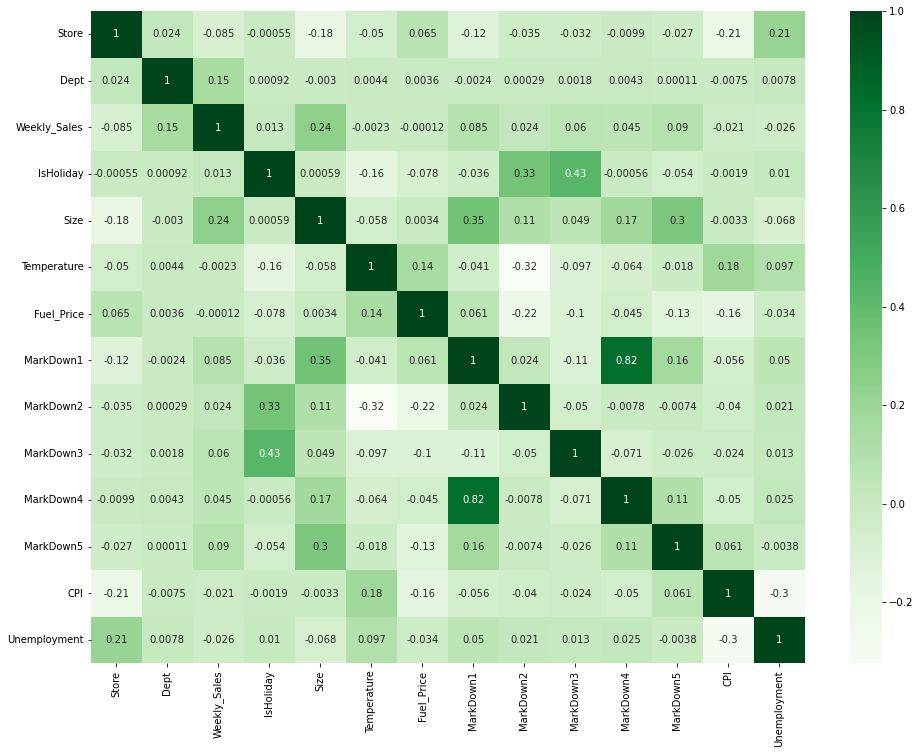

In [30]:
plt.figure(figsize=(16,12))
sns.heatmap(m, cmap="Greens",annot=True)

### There wasn't any significant correlation between MarkDown's Features and more 65% of null values are there in it so Decided to drop all the elements 
#### but problem statement wants to figure the effect of these markdowns

In [31]:
df_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [32]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [33]:
df_merge['Week'] = df_merge['Date'].dt.isocalendar().week
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Year'] = df_merge['Date'].dt.year

In [34]:
df_merge=df_merge.drop(['Date'],axis=1)


In [35]:
def scatter(column):
    plt.figure(figsize=(10,8), dpi=100)
    plt.scatter(df_merge[column],df_train['Weekly_Sales'])
    plt.xlabel(column)
    plt.ylabel('Weeklysales')

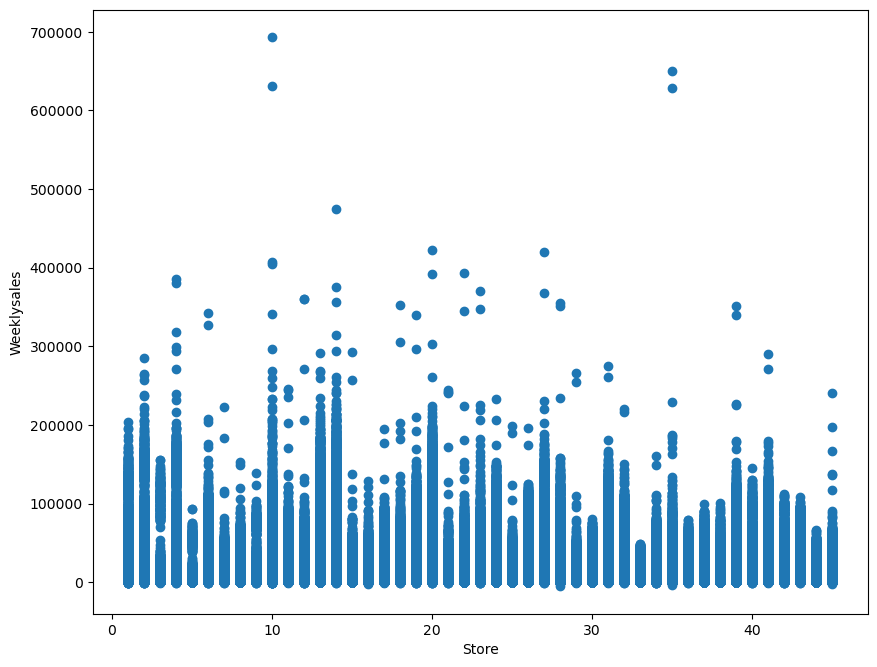

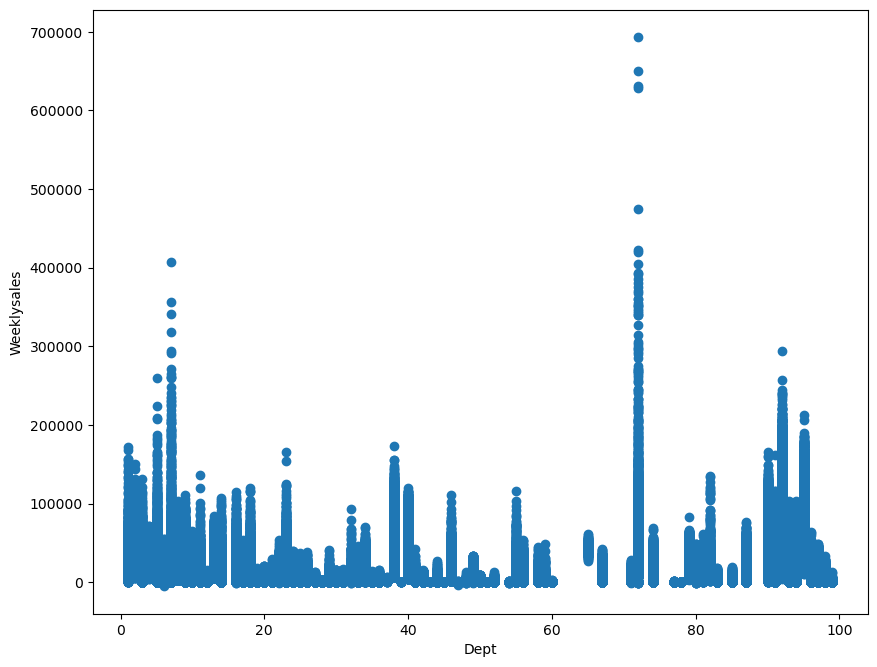

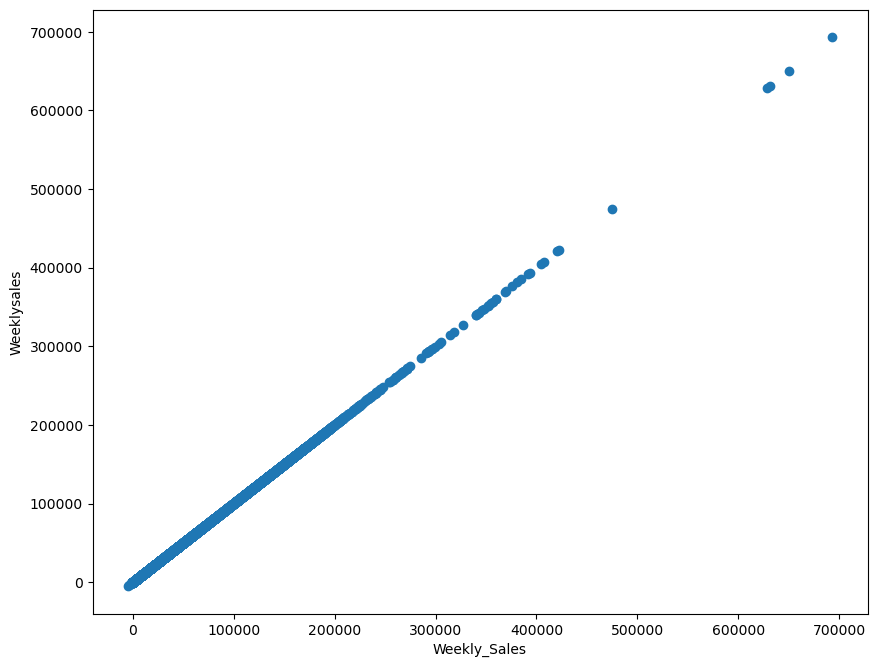

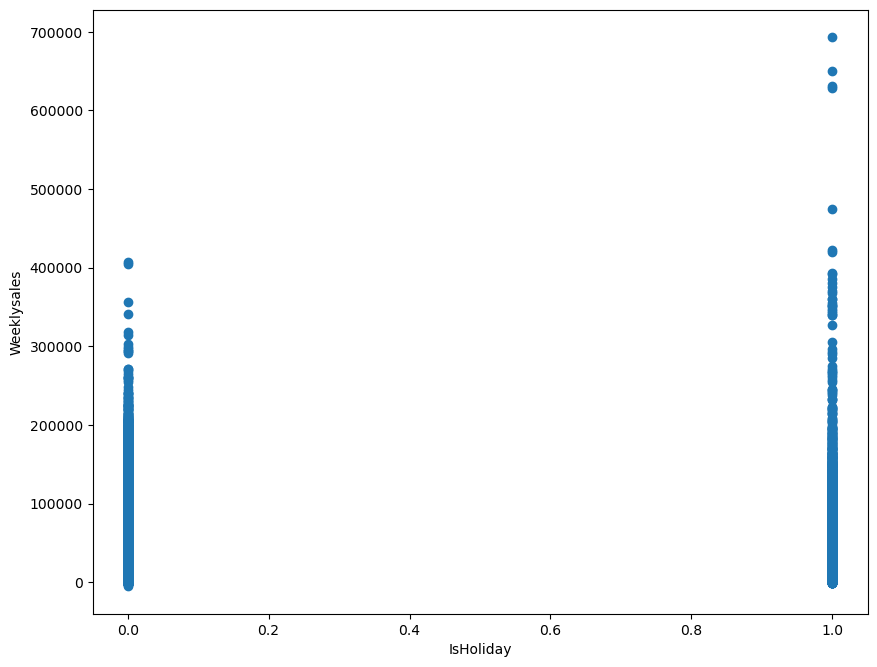

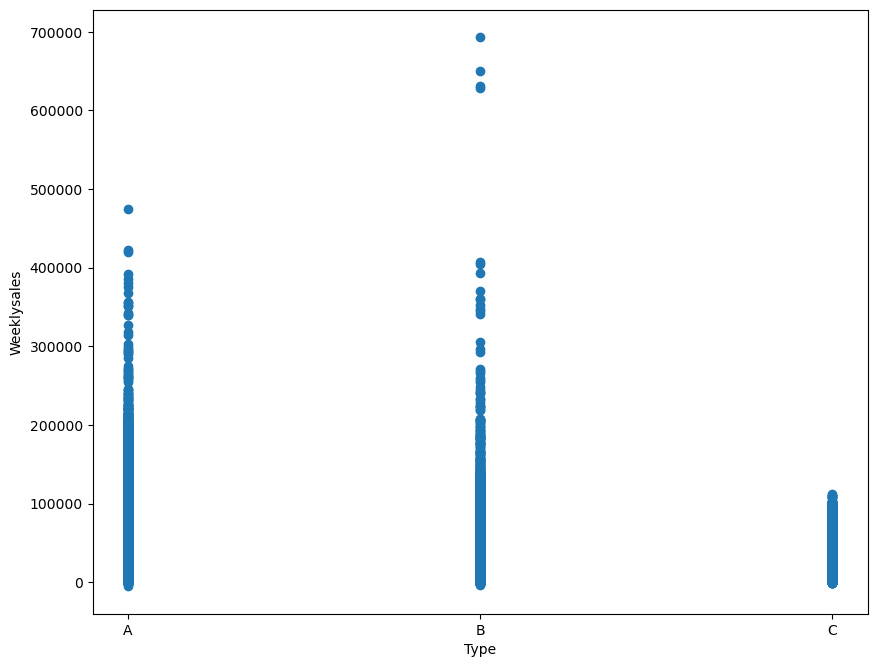

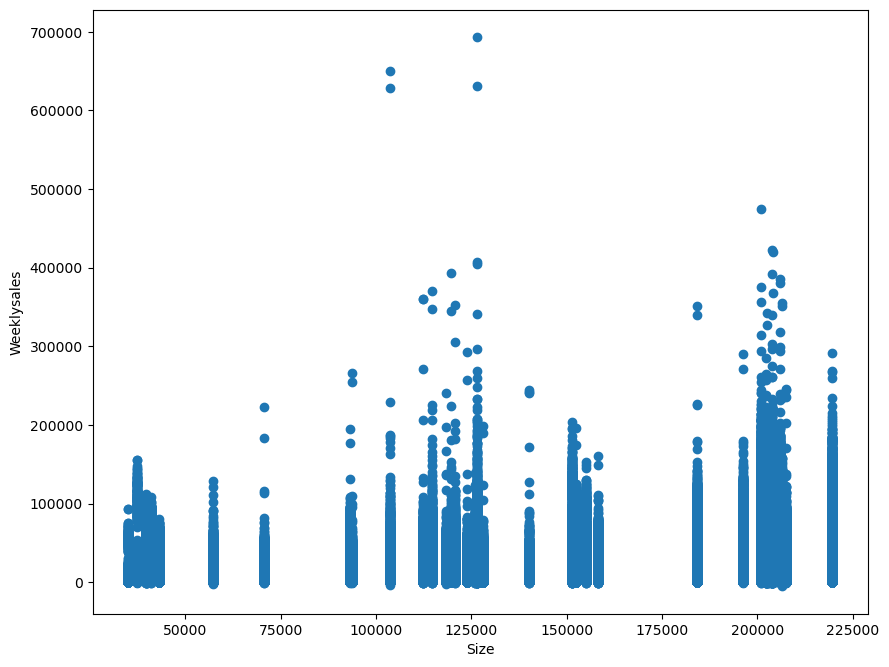

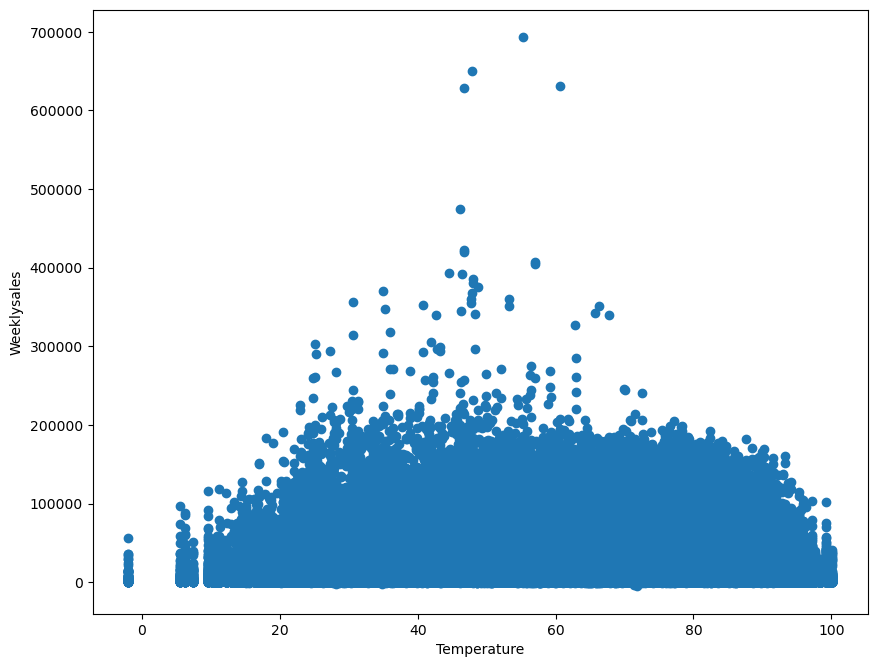

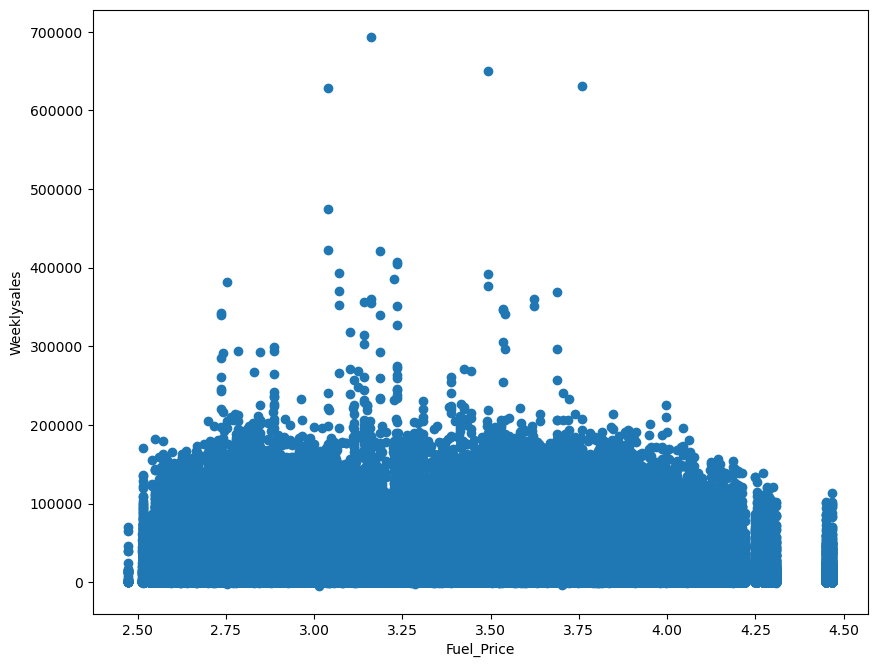

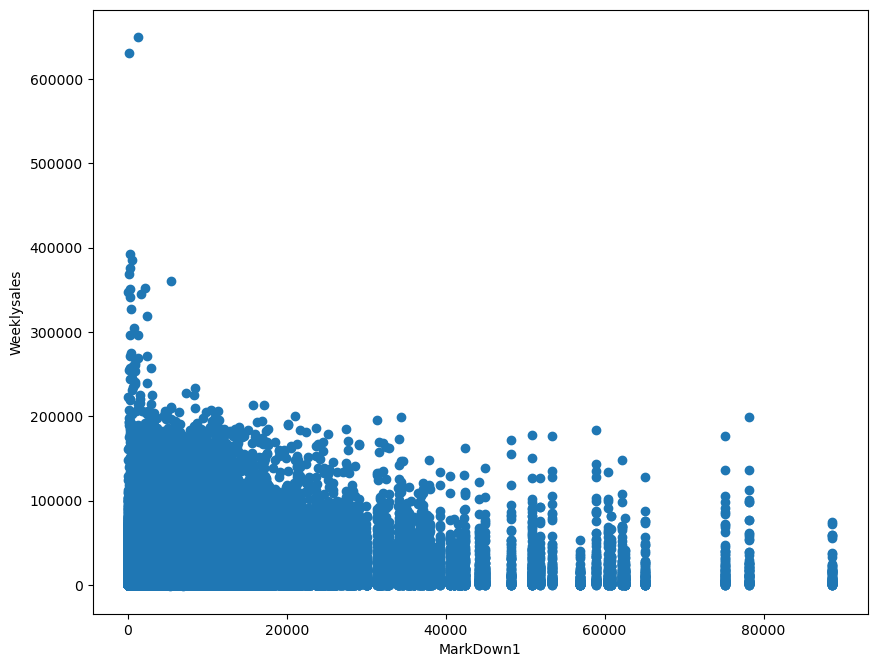

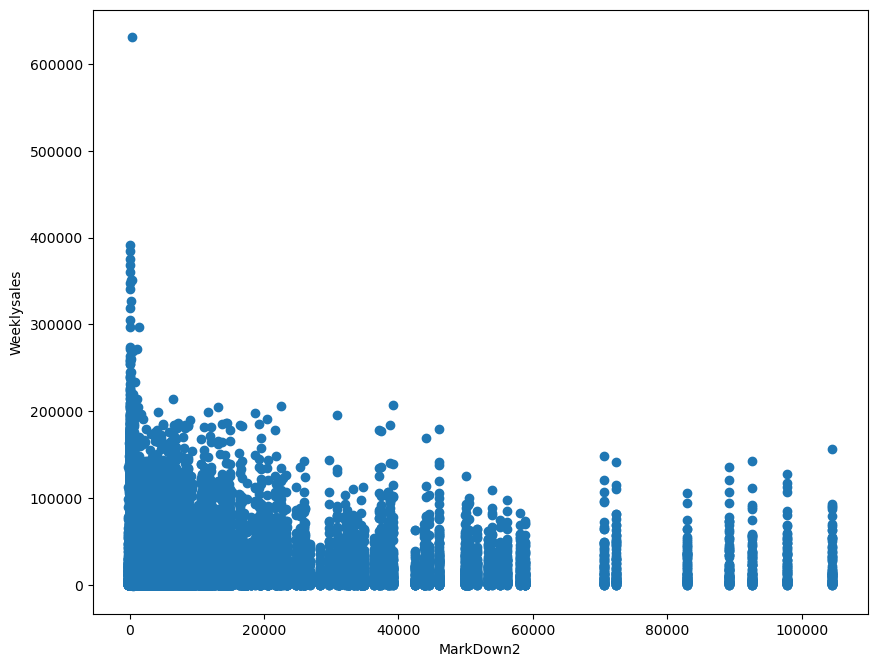

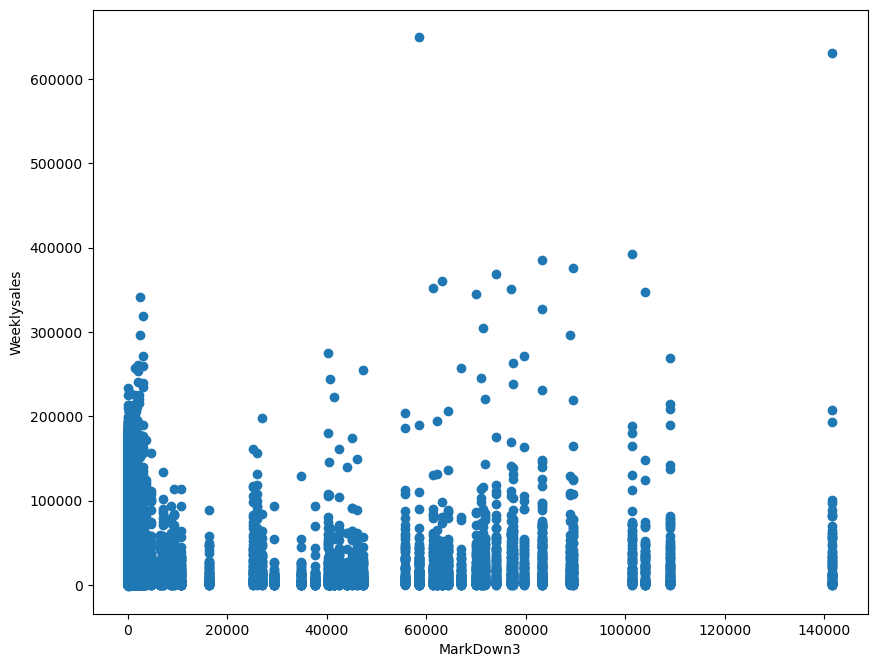

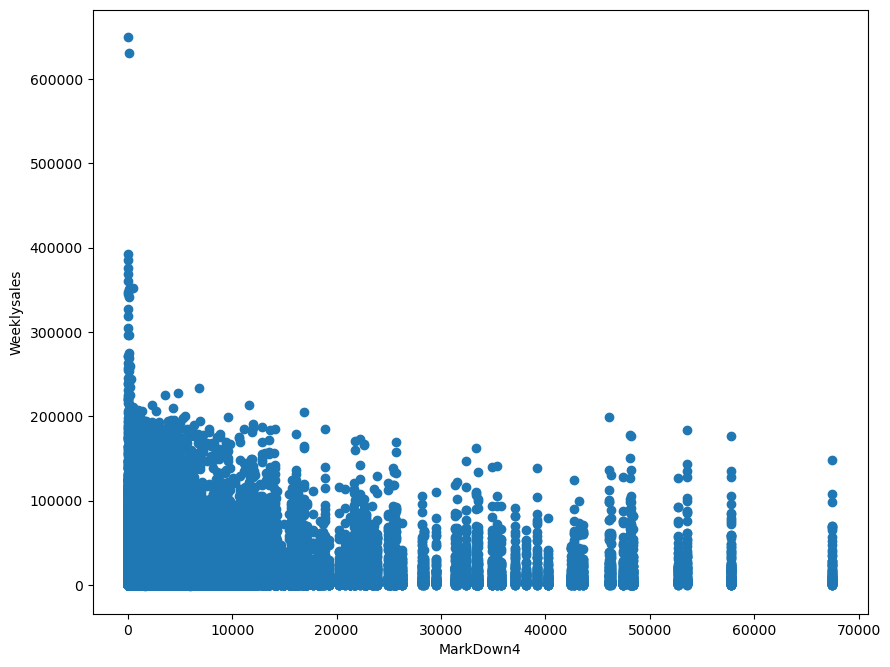

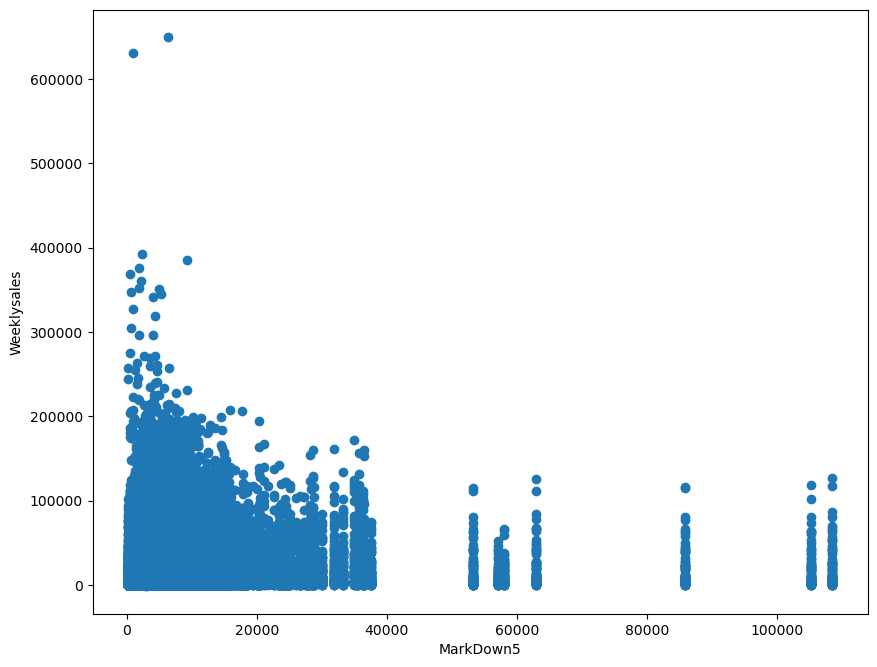

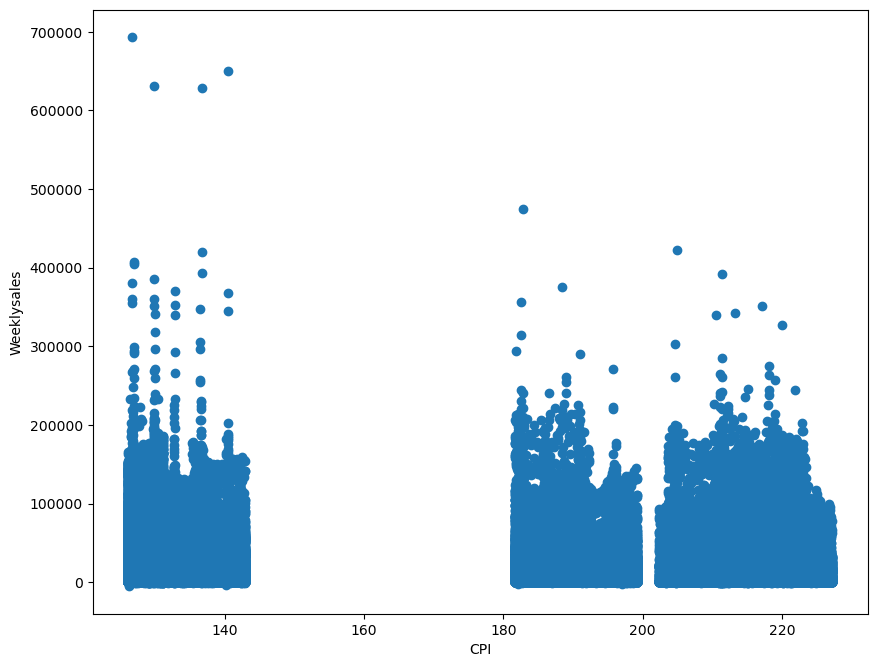

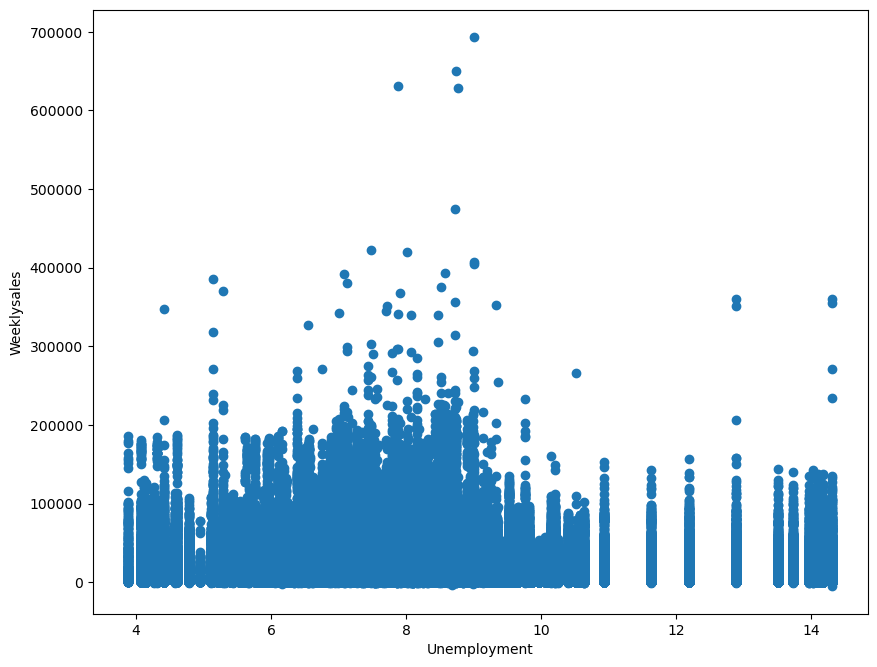

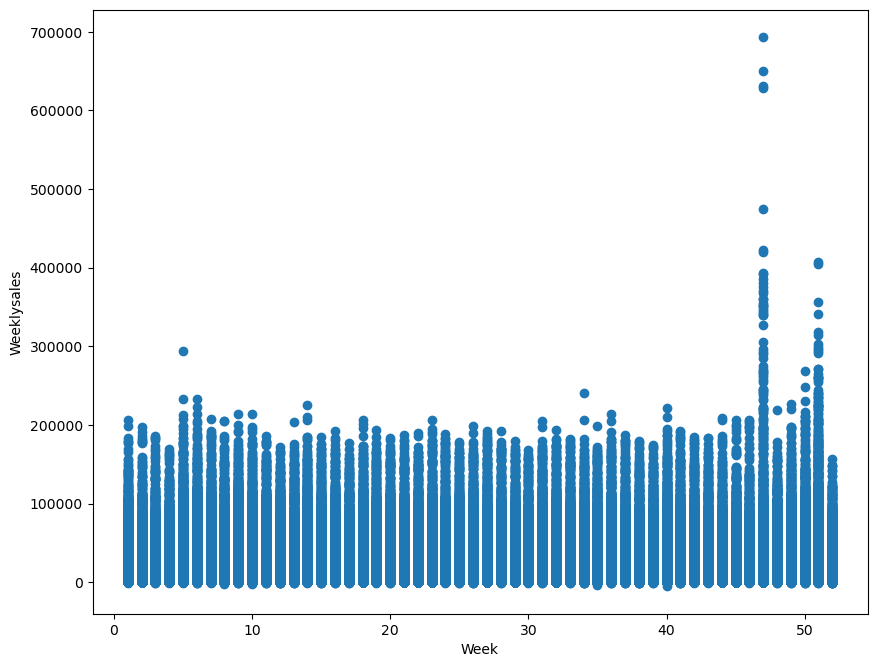

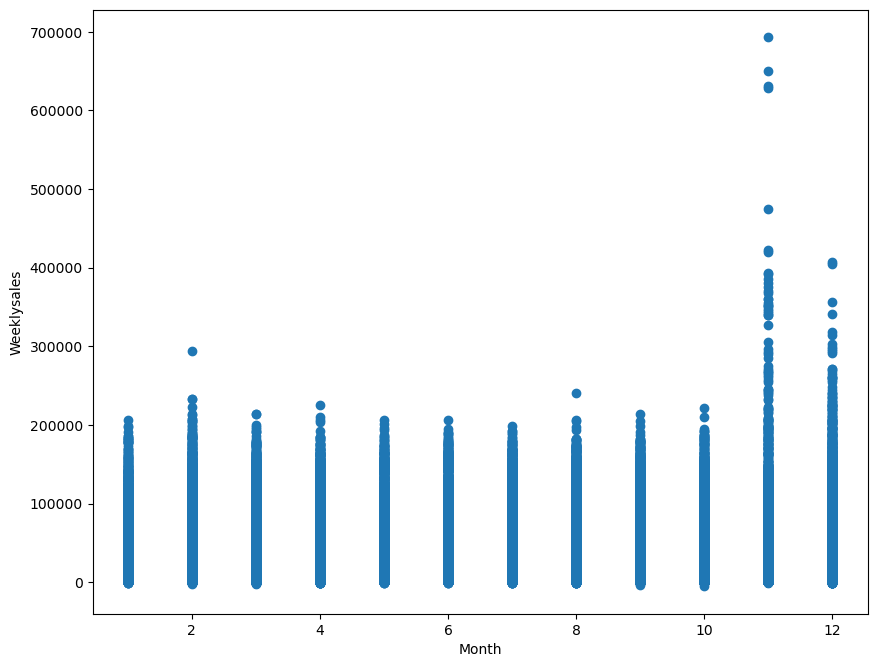

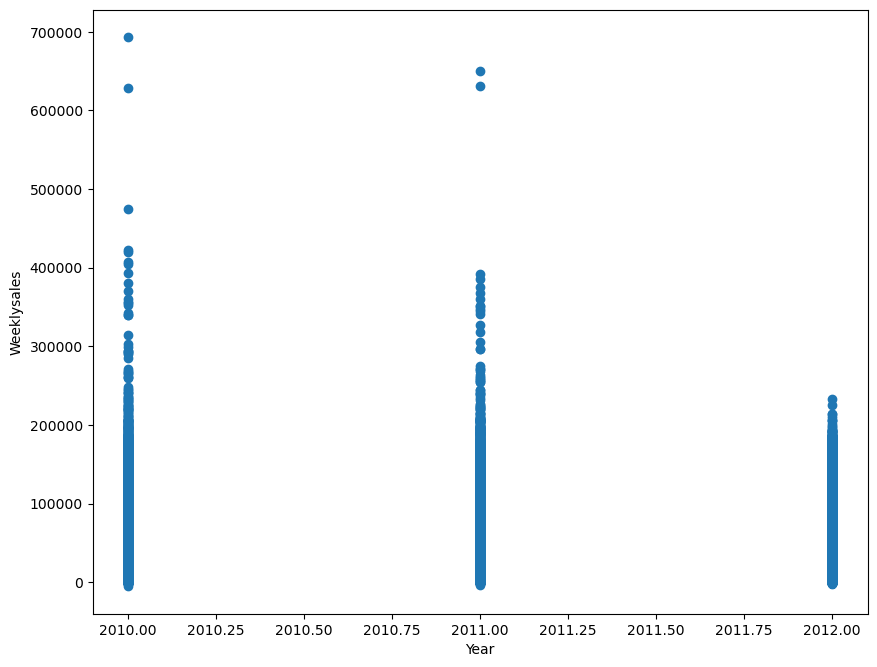

In [36]:
for column in df_merge.columns:
    scatter(column)

<AxesSubplot:>

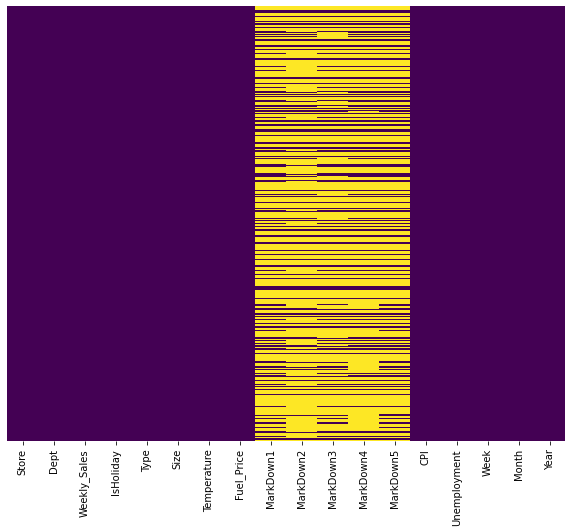

In [37]:
sns.heatmap(df_merge.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [38]:
df_merge=df_merge.fillna(0)

In [39]:
df_merge=pd.get_dummies(df_merge, columns=['Type'],drop_first=True)

In [40]:
df_merge.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year,Type_B,Type_C
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0,0
1,1,1,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2,2010,0,0
2,1,1,41595.55,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2,2010,0,0
3,1,1,19403.54,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2,2010,0,0
4,1,1,21827.90,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,3,2010,0,0


In [43]:
X=df_merge.drop(['Weekly_Sales'],axis=1)
y=df_merge['Weekly_Sales']

In [49]:
X.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year,Type_B,Type_C
0,1,1,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0,0
1,1,1,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,6,2,2010,0,0
2,1,1,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2,2010,0,0
3,1,1,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2,2010,0,0
4,1,1,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,3,2010,0,0


In [50]:
y.head()

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

### Test Data preparation

In [73]:
df_test_merge=df_test.merge(df_stores,how='left').merge(df_features,how='left')

In [74]:
df_test_merge.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [75]:
df_test_merge.shape

(115064, 15)

In [77]:
df_test_merge.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

### We need to fill the NaN values and we can do it by 


1.Drop that column
2.Drop that Row
3.a. Use mean or median inplace of Nan Values b. Fill with 0 or any other number c. Fill with mode if categorical values
4.Use imputation method
5.Use regression to fill the NaN Values`

In [79]:
df_test_merge['CPI'] = df_test_merge['CPI'].fillna(df_test_merge['CPI'].mean())
df_test_merge['Unemployment'] = df_test_merge['Unemployment'].fillna(df_test_merge['Unemployment'].mean())


In [80]:
df_test_merge.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI                 0
Unemployment        0
dtype: int64

In [83]:
df_test_merge['Date']=pd.to_datetime(df_test_merge['Date'])

In [88]:
df_test_merge['Week']=df_test_merge['Date'].dt.isocalendar().week
df_test_merge['Month']=df_test_merge['Date'].dt.month
df_test_merge['Year']=df_test_merge['Date'].dt.year

In [90]:
df_test_merge=df_test_merge.drop(['Date'],axis=1)

In [94]:
df_test_merge=pd.get_dummies(df_test_merge, columns=['Type'], drop_first=True)

In [99]:
df_test_merge = df_test_merge.fillna(0)

In [100]:
df_test_merge.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year,Type_B,Type_C
0,1,1,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,44,11,2012,0,0
1,1,1,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,45,11,2012,0,0
2,1,1,False,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,46,11,2012,0,0
3,1,1,True,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,47,11,2012,0,0
4,1,1,False,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,48,11,2012,0,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [52]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(random_state=42)

In [53]:
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
model1.score(X_test,y_test)

0.9753531560455951

In [102]:
y_pred=model1.predict(df_test_merge)

### Submitting format for kaggle:

In [105]:
y_predicted=pd.DataFrame(y_pred)

In [108]:
sub_df=pd.read_csv('sampleSubmission.csv')
dataset=pd.concat([sub_df['Id'],y_predicted],axis=1)
dataset.columns=['Id','Weekly_Sales']

In [109]:
dataset.to_csv('Submission1.csv',index=False)